# **Análise Comparativa de Preços de Aluguel por Bairro em São Paulo**




In [1]:
#Importando as bibiliotecas
import pandas as pd
import numpy as np

**Carregando conjunto de dados com o Pandas**

In [2]:
df = pd.read_csv('quinto_andar.csv')
df.rename(columns={'total':'total_aluguel'}, inplace=True)

**Explorando conjunto de dados**

In [3]:
df.info
#Verificando valores nulos por colunas
df.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total_aluguel      0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [37]:
bairros = df['bairro'].drop_duplicates().unique()
lista_bairro = bairros.tolist()
regiao = {'Liberdade':'Central','Santa Cecília':'Central', 'Aclimação':'Central', 'Vila Guilherme':'Norte', 'Pari':'Central', 
          'Perdizes':'Oeste', 'Barra Funda':'Oeste', 'Ipiranga':'Leste', 'Mooca':'Leste', 'Casa Verde':'Norte', 'Jardim Paulista':'Oeste', 
          'Paraíso':'Sul', 'Consolação':'Central', 'Sumaré':'Oeste', 'Centro':'Central', 'Belém':'Leste', 'Cambuci':'Central', 
          'Brás':'Leste', 'Bela Vista':'Central', 'Vila Mariana':'Sul', 'Vila Maria':'Norte','Pinheiros':'Oeste', 'Bom Retiro':'Central', 
          'Vila Pompéia':'Oeste', 'Higienópolis':'Central', 'Canindé':'Norte', 'Vila Olímpia':'Oeste', 'Vila Nova Conceição':'Sul', 
          'Itaim Bibi':'Oeste','Santana':'Norte','Vila Prudente':'Leste', 'Água Branca':'Oeste', 'Vila Clementino':'Sul', 
          'Jardim América':'Oeste', 'Moema':'Sul', 'Pacaembu':'Oeste'
}

#Criando uma nova coluna 'regiao'
df['regiao'] = df['bairro'].map(regiao)


['Liberdade', 'Santa Cecília', 'Aclimação', 'Vila Guilherme', 'Pari', 'Perdizes', 'Barra Funda', 'Ipiranga', 'Mooca', 'Casa Verde', 'Jardim Paulista', 'Paraíso', 'Consolação', 'Sumaré', 'Centro', 'Belém', 'Cambuci', 'Brás', 'Bela Vista', 'Vila Mariana', 'Vila Maria ', 'Pinheiros', 'Bom Retiro', 'Vila Pompéia', 'Higienópolis', 'Canindé', 'Vila Olímpia', 'Vila Nova Conceição', 'Itaim Bibi', 'Santana', 'Vila Prudente', 'Água Branca', 'Vila Clementino', 'Jardim América', 'Moema', 'Pacaembu']


,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total_aluguel,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Central
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Central
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Central
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,Central
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,https://www.quintoandar.com.br/imovel/89282425...,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,Central
2771,https://www.quintoandar.com.br/imovel/89336040...,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Central
2772,https://www.quintoandar.com.br/imovel/89292613...,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0,Leste
2773,https://www.quintoandar.com.br/imovel/89336592...,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0,Central


In [38]:
#Removendo dados faltantes do dataset

df = df.dropna()
df.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total_aluguel      0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
regiao             0
dtype: int64

In [39]:
df.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total_aluguel,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,regiao
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0,Central
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0,Central
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0,Central
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,Central
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0,Norte


## **Análise exploratória e Visualização**

#### **Estatísticas descritivas**



In [7]:
#Importando as bibiliotecas de visualização 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Gráfio de dispersão**

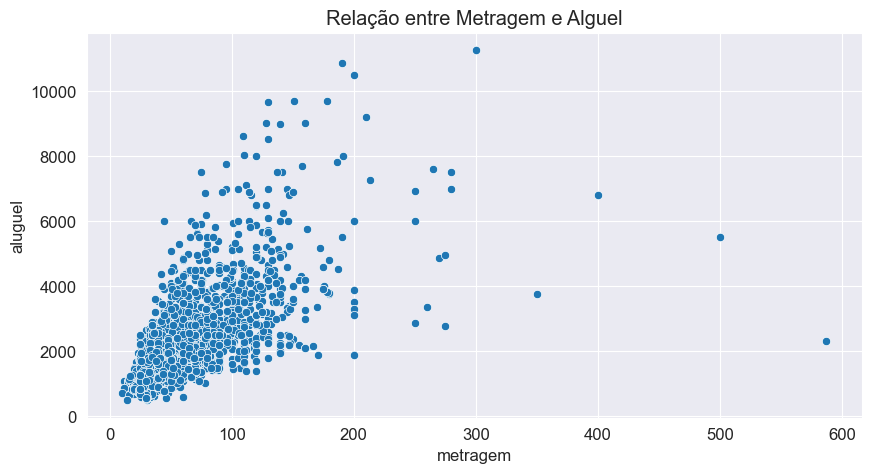

Correlação: 0.6380963702875032


In [8]:
#Grafico de dispersão
sns.scatterplot(data=df, x='metragem',y='aluguel')
plt.title('Relação entre Metragem e Alguel')
plt.show()
#Verificar a correlção entre as duas variáveis
correlacao = df['metragem'].corr(df['aluguel'])
print("Correlação:", correlacao)

Podemos inferir que a quanto maior for a metragem de um apartamento maior vai ser o seu valor.


**Gráfico BoxPlot**

Vamos comparar os preços dos alguéis por número de quartos e vamos verficar se a proximidade do metrô pode influenciar no preço do imovél


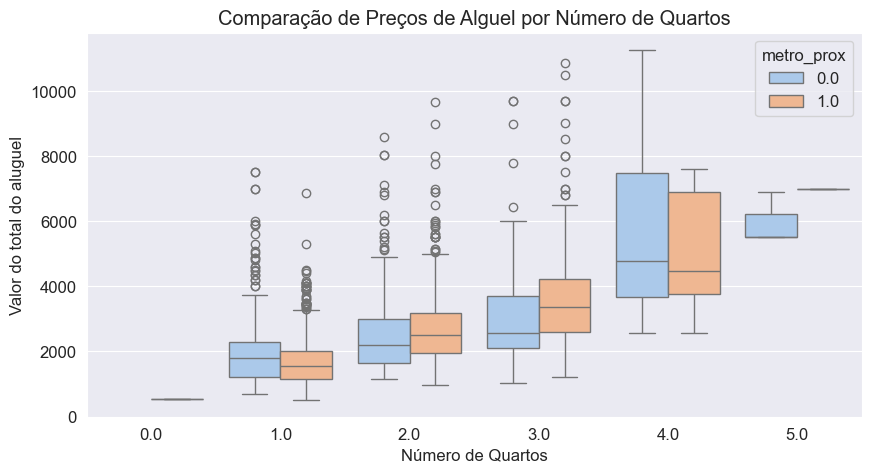

In [9]:
sns.boxplot(x='quarto', y='aluguel', data=df, hue='metro_prox', palette='pastel')
plt.title('Comparação de Preços de Alguel por Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do total do aluguel')
plt.show()

Conforme podemos ver no gráfico acima existe uma relação entre o preço do alguel com o número de quartos, quanto mais quartos o imóvel tiver maior tende a ser o valor do seu aluguel.

Outro fator determinante para o valor do aluguel é a proximidade do metrô, podemos aferir que regiões que possuem estações de metrô próximas o valor do imóvel tende a valorizar e consequentemente é possível aumentar o valor do alguel.

In [23]:
#Agrupar o valor por bairro e calcular a média do valor do alguel
df_agrupado = df.groupby('bairro')['aluguel'].max().reset_index()

#Ordenar por valor de alguel de forma decrscente 
df_ordenado = df_agrupado.sort_values('aluguel', ascending=False)

#Selecionar os 5 primeiros
top_5_bairros = df_ordenado.head(5)

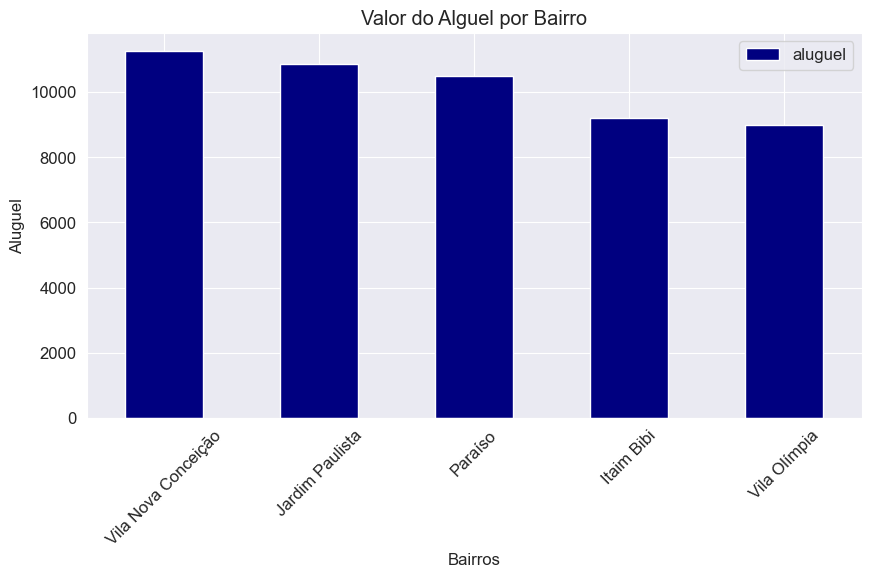

In [31]:
#criar o gráfico
top_5_bairros.plot(kind='bar', x='bairro', y='aluguel', color='navy')

# Personalizar o gráfico
plt.title('Valor do Alguel por Bairro')
plt.xlabel('Bairros')
plt.ylabel('Aluguel')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x

plt.show()

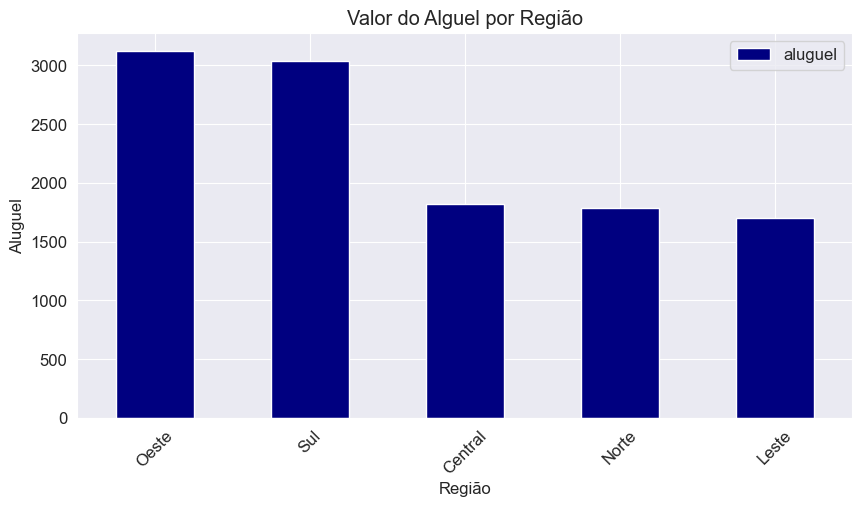

In [52]:
#Agrupar o valor por regiao e calcular a média do valor do alguel
df_agrupado = df.groupby('regiao')['aluguel'].mean().reset_index()

#Ordenar por valor de alguel de forma decrscente 
df_ordenado = df_agrupado.sort_values('aluguel', ascending=False)

#Selecionar os 5 primeiros
regiao = df_ordenado.head(5)


regiao.plot(kind='bar',x='regiao', y='aluguel', color='navy')

# Personalizar o gráfico
plt.title('Valor do Alguel por Região')
plt.xlabel('Região')
plt.ylabel('Aluguel')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x

plt.show()